## Problem Statement

We'll use statsmodels to fit some (Ordinary Least Squares) linear models using random data.

First make a response **y** of 200 random numbers. Then generate 20 random features in an **X** to predict with. Fit a linear model using both the 'Famous Equation' and the python built-ins. Check the summary() output of the results from the python built-ins. Do you have any features with P>|t| less than 0.05? (Repeat the process until you have at least one.)

Check out the model's R-squared and Adj. R-squared. Repeat the feature generation and model fitting process with 40, 60, 80, and 100 features. What happens with R-squared and Adj. R-squared?

If you have time, automate this experimental procedure and make a plot of R-squared and Adj. R-squared against number of features for one to one hundred features.

## Solution

In [1]:
%matplotlib inline

import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

/Users/davidziganto/anaconda/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


#### Function to Generate Random Data

In [2]:
def generate_random_data(num_rows, num_features, random_state=None):
    '''returns 2D numpy based on user-defined inputs with random features.'''
    if random_state:
        np.random.seed(random_state)
    for feature in range(num_features):
        if feature == 0:
            data = np.random.uniform(size=num_rows)
        elif feature == 1:
            data = np.hstack((data.reshape(-1,1),
                              np.random.uniform(size=num_rows).reshape(-1,1)))
        else:
            data = np.hstack((data, np.random.uniform(size=num_rows).reshape(-1,1)))
    return data

#### Examples

In [3]:
# not reproducible
generate_random_data(num_rows=10, num_features=1, random_state=None)

array([ 0.13919365,  0.41774229,  0.19783082,  0.60390506,  0.2983936 ,
        0.84592261,  0.11423064,  0.79070327,  0.32579652,  0.08888766])

In [4]:
# reproducible
generate_random_data(num_rows=10, num_features=1, random_state=42)

array([ 0.37454012,  0.95071431,  0.73199394,  0.59865848,  0.15601864,
        0.15599452,  0.05808361,  0.86617615,  0.60111501,  0.70807258])

In [5]:
# multiple columns + reproducible
generate_random_data(num_rows=10, num_features=5, random_state=42)

array([[ 0.37454012,  0.02058449,  0.61185289,  0.60754485,  0.12203823],
       [ 0.95071431,  0.96990985,  0.13949386,  0.17052412,  0.49517691],
       [ 0.73199394,  0.83244264,  0.29214465,  0.06505159,  0.03438852],
       [ 0.59865848,  0.21233911,  0.36636184,  0.94888554,  0.9093204 ],
       [ 0.15601864,  0.18182497,  0.45606998,  0.96563203,  0.25877998],
       [ 0.15599452,  0.18340451,  0.78517596,  0.80839735,  0.66252228],
       [ 0.05808361,  0.30424224,  0.19967378,  0.30461377,  0.31171108],
       [ 0.86617615,  0.52475643,  0.51423444,  0.09767211,  0.52006802],
       [ 0.60111501,  0.43194502,  0.59241457,  0.68423303,  0.54671028],
       [ 0.70807258,  0.29122914,  0.04645041,  0.44015249,  0.18485446]])

#### Generate Data

In [6]:
y = generate_random_data(num_rows=200, num_features=1, random_state=101)
X = generate_random_data(num_rows=200, num_features=20, random_state=99)

#### Model w/20 Features

In [7]:
results = sm.OLS(y, X).fit()

In [8]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     28.99
Date:                Tue, 02 Jan 2018   Prob (F-statistic):           8.09e-46
Time:                        09:09:47   Log-Likelihood:                -33.271
No. Observations:                 200   AIC:                             106.5
Df Residuals:                     180   BIC:                             172.5
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0835      0.077      1.085      0.2

#### Get $R^2$

In [9]:
results.rsquared

0.76308605022488574

#### Get Adjusted $R^2$

In [10]:
results.rsquared_adj

0.73676227802765082

#### Automated Processing

In [11]:
min_features = 1
max_features = 100

r_squared = []
adj_r_squared = []

y = generate_random_data(num_rows=200, num_features=1, random_state=99)

for features in range(min_features, max_features+1):
    X = generate_random_data(num_rows=200, num_features=features, random_state=101)
    results = sm.OLS(y, X).fit()
    r_squared.append(results.rsquared)
    adj_r_squared.append(results.rsquared_adj)

#### Plot

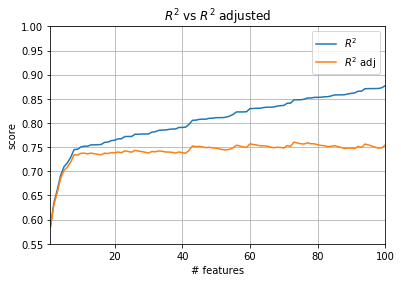

In [12]:
plt.plot(np.arange(1,101), r_squared, label='$R^2$')
plt.plot(np.arange(1,101), adj_r_squared, label='$R^2$ adj')
plt.title('$R^2$ vs $R^2$ adjusted')
plt.xlabel('# features')
plt.ylabel('score')
plt.xlim(1,100)
plt.ylim(0.55, 1)
plt.legend()
plt.grid();